In [46]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import matplotlib.patches as patches
from shapely.geometry import Polygon
import pandas as pd
import re
import plotly.graph_objects as go
import os
import random
import plotly.express as px

In [3]:
def process_files(directory):
  files = os.listdir(directory)
  result = {}

  for file in files:
      if file.endswith('.txt'):
          with open(os.path.join(directory, file), 'r') as f:
              data = []
              for line in f:
                  fields = line.split()
                  if len(fields) == 8:
                      x = int(float(fields[3]))
                      y = int(float(fields[4]))
                      z = -int(float(fields[5]))
                      t = int(fields[7])
                      data.append([x, y, z, t])
              result[file] = data
  return result

In [4]:
directory = 'C:/HV/Seismic/datas/Faults_TWT_Charisma_fault_sticks_ASCII'
faults_original = process_files(directory)

In [5]:
print(faults_original)

{'Graben10_E.txt': [[451094, 7007473, -1900, 1], [450184, 7007473, -2505, 1], [451363, 7007223, -1871, 2], [450364, 7007223, -2489, 2], [450889, 7007723, -1888, 3], [450018, 7007723, -2511, 3], [450697, 7007973, -1867, 4], [449826, 7007973, -2511, 4], [450480, 7008222, -1873, 5], [449646, 7008223, -2496, 5], [450261, 7008472, -1867, 6], [449391, 7008472, -2511, 6]], 'Graben10_W.txt': [[448545, 7007723, -1888, 1], [449288, 7007723, -2509, 1], [448673, 7007473, -1894, 2], [449468, 7007473, -2492, 2], [448404, 7007973, -1875, 3], [449096, 7007973, -2488, 3], [448264, 7008223, -1877, 4], [448917, 7008223, -2491, 4], [448162, 7008472, -1844, 5], [448814, 7008472, -2508, 5], [448073, 7008722, -1878, 6], [448648, 7008722, -2514, 6], [448866, 7007223, -1887, 7], [449646, 7007223, -2483, 7], [449058, 7006974, -1887, 8], [449890, 7006973, -2483, 8]], 'Graben11_E.txt': [[451363, 7006474, -1893, 1], [450530, 7006474, -2499, 1], [451554, 7006224, -1878, 2], [450748, 7006224, -2488, 2], [451196, 700

In [6]:
"""
Сборка координат в один список попарно
Если точек больше 2, то берется минимальное и максимальное значение по глубинам
Если точка 1, то она не учитывается в разломах
"""
faults_final = {}

for key in faults_original:
  dop_spisok = []
  z_spisok = []
  faults_final[key] = []


  for i in range(len(faults_original[key])):
      if len(dop_spisok) == 0:
          dop_spisok.append(faults_original[key][i])
          z_spisok.append(faults_original[key][i][2])
      elif len(dop_spisok) == 1:
          if dop_spisok[0][3] == faults_original[key][i][3]:
              dop_spisok.append(faults_original[key][i])
              z_spisok.append(faults_original[key][i][2])
          else:
              dop_spisok.clear()
              z_spisok.clear()
              dop_spisok.append(faults_original[key][i])
              z_spisok.append(faults_original[key][i][2])
      elif len(dop_spisok) == 2:
          if dop_spisok[0][3] == faults_original[key][i][3]:
              dop_spisok.append(faults_original[key][i])
              z_spisok.append(faults_original[key][i][2])
          else:
              #faults_final.append(dop_spisok[:])
              faults_final[key].append(dop_spisok[:])
              dop_spisok.clear()
              z_spisok.clear()
              dop_spisok.append(faults_original[key][i])
              z_spisok.append(faults_original[key][i][2])
      else:
          if dop_spisok[0][3] == faults_original[key][i][3]:
              dop_spisok.append(faults_original[key][i])
              z_spisok.append(faults_original[key][i][2])
          else:
              faults_final[key].append([dop_spisok[z_spisok.index(min(z_spisok))], dop_spisok[z_spisok.index(max(z_spisok))]])
              dop_spisok.clear()
              z_spisok.clear()
              dop_spisok.append(faults_original[key][i])
              z_spisok.append(faults_original[key][i][2])

In [14]:
print(faults_final)

{'Graben10_E.txt': [[[451094, 7007473, -1900, 1], [450184, 7007473, -2505, 1]], [[451363, 7007223, -1871, 2], [450364, 7007223, -2489, 2]], [[450889, 7007723, -1888, 3], [450018, 7007723, -2511, 3]], [[450697, 7007973, -1867, 4], [449826, 7007973, -2511, 4]], [[450480, 7008222, -1873, 5], [449646, 7008223, -2496, 5]]], 'Graben10_W.txt': [[[448545, 7007723, -1888, 1], [449288, 7007723, -2509, 1]], [[448673, 7007473, -1894, 2], [449468, 7007473, -2492, 2]], [[448404, 7007973, -1875, 3], [449096, 7007973, -2488, 3]], [[448264, 7008223, -1877, 4], [448917, 7008223, -2491, 4]], [[448162, 7008472, -1844, 5], [448814, 7008472, -2508, 5]], [[448073, 7008722, -1878, 6], [448648, 7008722, -2514, 6]], [[448866, 7007223, -1887, 7], [449646, 7007223, -2483, 7]]], 'Graben11_E.txt': [[[451363, 7006474, -1893, 1], [450530, 7006474, -2499, 1]], [[451554, 7006224, -1878, 2], [450748, 7006224, -2488, 2]], [[451196, 7006724, -1868, 3], [450428, 7006724, -2495, 3]], [[451004, 7006973, -1868, 4], [450184, 7

In [7]:
def gorizont_coord(file):
   with open(file, 'r') as f:
       gorizon = []
       for line in f:
           if not line.startswith('#'):  # Пропуск строк, начинающихся с #
               x, y, z, *rest = line.split()  # Разбиение строки по столбцам
               x = int(x.split('.')[0])  # Получение целочисленного значения из первого столбца
               y = int(y.split('.')[0])  # Получение целочисленного значения из второго столбца
               z = int(z.split('.')[0])  # Получение целочисленного значения из третьего столбца
               gorizon.append([x, y, z])  # Добавление данных в словарь
          
   return gorizon

In [8]:
Top = gorizont_coord('C:/HV/Seismic/datas/TWT_Top_U1.txt')

In [9]:
print(Top[0:10])

[[445946, 7004198, -2294], [445996, 7004198, -2294], [446046, 7004198, -2295], [446096, 7004198, -2296], [446146, 7004198, -2297], [446196, 7004198, -2297], [446246, 7004198, -2298], [446296, 7004198, -2298], [446346, 7004198, -2299], [446396, 7004198, -2299]]


In [10]:
Bottom = gorizont_coord('C:/HV/Seismic/datas/TWT_Bottom_U1.txt')

In [11]:
print(Bottom[0:10])

[[445946, 7004198, -2329], [445996, 7004198, -2329], [446046, 7004198, -2330], [446096, 7004198, -2331], [446146, 7004198, -2332], [446196, 7004198, -2333], [446246, 7004198, -2333], [446296, 7004198, -2333], [446346, 7004198, -2333], [446396, 7004198, -2333]]


In [49]:
def show_map(maps, razlom, f):
    # срез карты по осям ХУ


    #x = [point[0] for point in maps]
    #y = [point[1] for point in maps]
    values = [point[2] for point in maps]
    points = [[point[0], point[1]] for point in maps]
    # Создание графика
    plt.figure(figsize=(6, 6))
    #scatter = plt.scatter(x=x, y=y, c=values)
    scatter = plt.scatter(x=list(zip(*points))[0], y=list(zip(*points))[1], c=values)
    
    # Задание меток на осях X и Y
    x_ticks = [min(list(zip(*points))[0]), np.percentile(list(zip(*points))[0], 33), 
               np.percentile(list(zip(*points))[0], 66), 
               max(list(zip(*points))[0])]
    y_ticks = [min(list(zip(*points))[1]), np.percentile(list(zip(*points))[1], 33), 
               np.percentile(list(zip(*points))[1], 66), 
               max(list(zip(*points))[1])]
    plt.xticks(x_ticks, labels=[f'{int(x)}' for x in x_ticks])
    plt.yticks(y_ticks, labels=[f'{int(y)}' for y in y_ticks])
    
    
    #plt.xticks([ilines[0], ilines[100], ilines[200], ilines[300], ilines[400], ilines[500], ilines[-1]])
    #plt.yticks([xlines[0], xlines[100], xlines[200], xlines[300], xlines[400], xlines[500], xlines[-1]])
    if f==0:
        plt.title('Карта кровли')
    else:
        plt.title('Карта подошвы')
    
    
    plt.ylabel('Инлайны')
    plt.xlabel('Кросслайны')
    plt.colorbar(scatter, label='Шкала значений сейсмотрассы')

    x_razlom = []
    y_razlom = []
    values_razlom = []
    for i in range(len(razlom)):
        if f == 0:
            if razlom[i][0][2] > razlom[i][1][2]:
                x_razlom.append(razlom[i][0][0])
                y_razlom.append(razlom[i][0][1])
                values_razlom.append(razlom[i][0][2])
            else:
                x_razlom.append(razlom[i][1][0])
                y_razlom.append(razlom[i][1][1])
                values_razlom.append(razlom[i][1][2])
        else:
            if razlom[i][0][2] < razlom[i][1][2]:
                x_razlom.append(razlom[i][0][0])
                y_razlom.append(razlom[i][0][1])
                values_razlom.append(razlom[i][0][2])
            else:
                x_razlom.append(razlom[i][1][0])
                y_razlom.append(razlom[i][1][1])
                values_razlom.append(razlom[i][1][2])
    plt.plot(x_razlom, y_razlom, color='red', linewidth=2)  # Линия красного цвета с толщиной 2

    plt.grid(False)  # Отключение сетки
    plt.show()


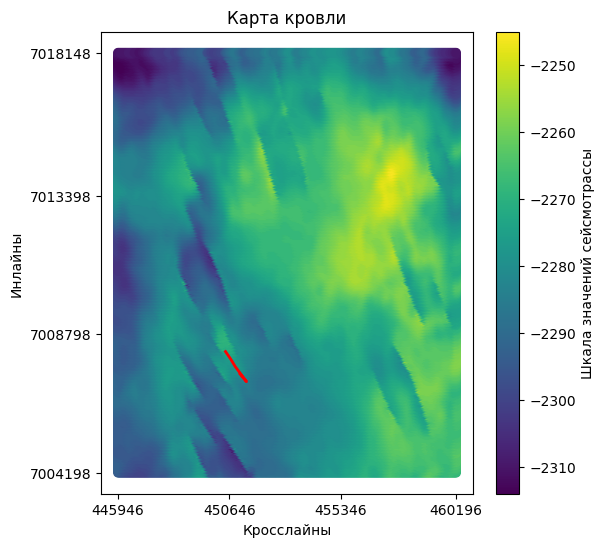

In [44]:
show_map(Top, faults_final['Graben10_E.txt'], 0)

In [50]:
print(faults_final['Graben10_E.txt'])

[[[451094, 7007473, -1900, 1], [450184, 7007473, -2505, 1]], [[451363, 7007223, -1871, 2], [450364, 7007223, -2489, 2]], [[450889, 7007723, -1888, 3], [450018, 7007723, -2511, 3]], [[450697, 7007973, -1867, 4], [449826, 7007973, -2511, 4]], [[450480, 7008222, -1873, 5], [449646, 7008223, -2496, 5]]]


In [51]:
def find_closest_to_average(lst):
    # Вычисляем среднее значение
    average = sum(lst) / len(lst)

    # Находим элемент, наиболее близкий к среднему значению
    closest_element = min(lst, key=lambda x: abs(x - average))
    return closest_element

In [54]:
coords_x_razloma = []
coords_y_razloma = []
for i in range(len(faults_final['Graben10_E.txt'])):
    coords_x_razloma.append(faults_final['Graben10_E.txt'][i][0][0])
    coords_y_razloma.append(faults_final['Graben10_E.txt'][i][0][1])

In [55]:
closest_to_average_x = find_closest_to_average(coords_x_razloma)
closest_to_average_y = find_closest_to_average(coords_y_razloma)
print(closest_to_average_x, closest_to_average_y)


450889 7007723


In [65]:
xx = []
zz = []
for i in range(len (Top)):
    if (closest_to_average_y - 50) <= Top[i][1] <= (closest_to_average_y + 50):
        xx.append(Top[i][0])
        zz.append(Top[i][2])

In [66]:
print(xx)

[445946, 445996, 446046, 446096, 446146, 446196, 446246, 446296, 446346, 446396, 446446, 446496, 446546, 446596, 446646, 446696, 446746, 446796, 446846, 446896, 446946, 446996, 447046, 447096, 447146, 447196, 447246, 447296, 447346, 447396, 447446, 447496, 447546, 447596, 447646, 447696, 447746, 447796, 447846, 447896, 447946, 447996, 448046, 448096, 448146, 448196, 448246, 448296, 448346, 448396, 448446, 448496, 448546, 448596, 448646, 448696, 448746, 448796, 448846, 448896, 448946, 448996, 449046, 449096, 449146, 449196, 449246, 449296, 449346, 449396, 449446, 449496, 449546, 449596, 449646, 449696, 449746, 449796, 449846, 449896, 449946, 449996, 450046, 450096, 450146, 450196, 450246, 450296, 450346, 450396, 450446, 450496, 450546, 450596, 450646, 450696, 450746, 450796, 450846, 450896, 450946, 450996, 451046, 451096, 451146, 451196, 451246, 451296, 451346, 451396, 451446, 451496, 451546, 451596, 451646, 451696, 451746, 451796, 451846, 451896, 451946, 451996, 452046, 452096, 452146,

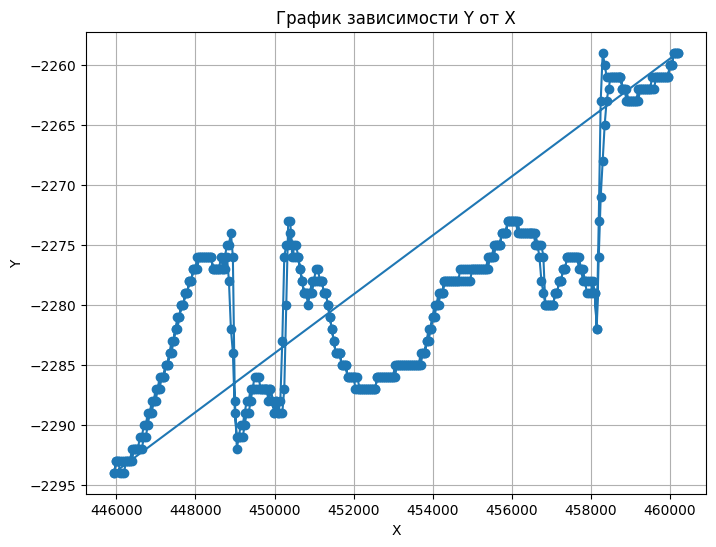

In [67]:
# Создание графика
plt.figure(figsize=(8, 6))  # Задаем размер графика
plt.plot(xx, zz, marker='o')  # Строим график, добавляем маркеры для точек

# Добавление заголовка и меток осей
plt.title('График зависимости Y от X')
plt.xlabel('X')
plt.ylabel('Y')

# Отображение сетки
plt.grid(True)

# Показ графика
plt.show()

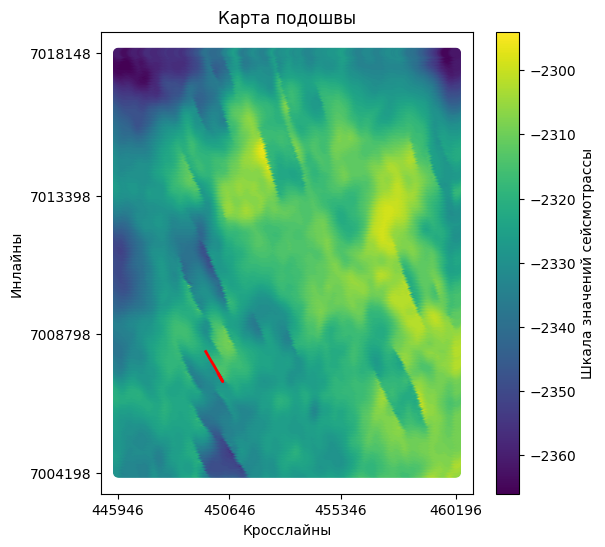

In [45]:
show_map(Bottom, faults_final['Graben10_E.txt'], 1)